In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [2]:
filelist = glob.glob('FigsOF/*.tiff')
frames = np.array([np.array(cv2.imread(fname, 0)) for fname in filelist])
filelist.sort(key=natural_keys)
filelist

['FigsOF/IM0.tiff',
 'FigsOF/IM1.tiff',
 'FigsOF/IM2.tiff',
 'FigsOF/IM3.tiff',
 'FigsOF/IM4.tiff',
 'FigsOF/IM5.tiff',
 'FigsOF/IM6.tiff',
 'FigsOF/IM7.tiff',
 'FigsOF/IM8.tiff',
 'FigsOF/IM9.tiff',
 'FigsOF/IM10.tiff',
 'FigsOF/IM11.tiff',
 'FigsOF/IM12.tiff',
 'FigsOF/IM13.tiff',
 'FigsOF/IM14.tiff']

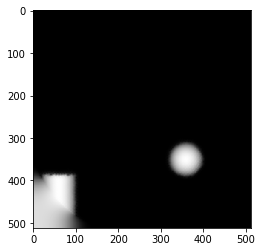

In [3]:
plt.imshow(frames[0], cmap="gray")

In [15]:
# attempt at raw SIFT
frame_prev = frame[0]
for frame in frames[1:]:     
    orb = cv2.ORB_create()
    
    kp_curr, des_curr = orb.detectAndCompute(frame,None)
    kp_prev, des_prev = orb.detectAndCompute(frame_prev, None)
    
    out = np.zeros_like(frame)
    img = cv2.drawKeypoints(frame,kp, out)
    
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # Draw first 10 matches.
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)

    plt.imshow(img3),plt.show()


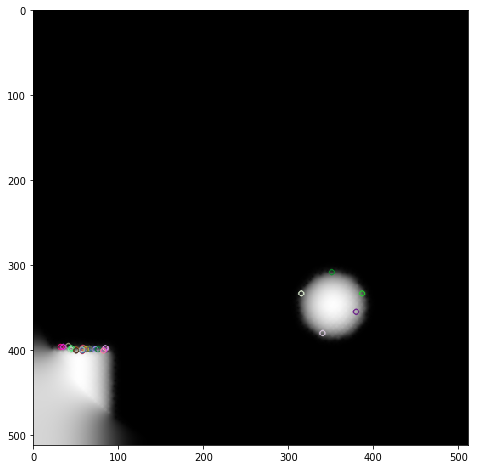

In [20]:
plt.figure(figsize=(8,8))

plt.imshow(img)
plt.show()